In [1]:
using OrdinaryDiffEq, ForwardDiff, Distributions, RandomNumbers, NPZ, PyPlot, StaticArrays, HDF5, CSV, DelimitedFiles

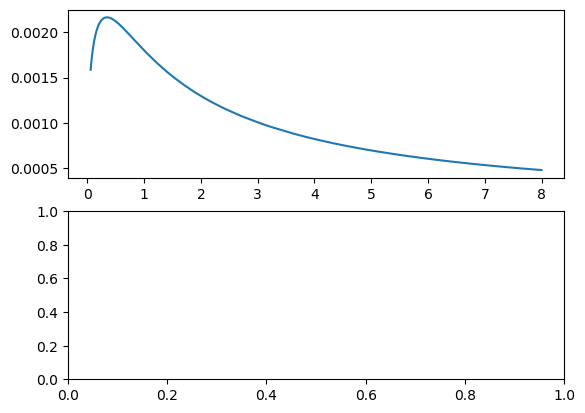

0.3759509184661184

In [5]:
Ns=16
Times=5000#000
listas=[0.6]
N=0
solu=0
w=0
alpha = 0.2
omega0 = 2 # (frequencia del sistema de dos niveles)
wc = 7*omega0/2
s = 0.1
a = 2.
b = 1.
Hpart!(x,p)=p^2. /2. -0.5*2. *x^2. +0.25*1. *x^4.
Hosci!(x,p,w)=p^2. /(0.1*2.)+0.05*w^2. *x^2.
Hcoup!(x,X,w,g)=-g*x*X +x*x*g*g/(2. *0.1*w*w)
#values=range(0.1,stop=6,length=9230329)
#golden=(1. +sqrt(5.))/2.
#mydist!(x)=x^0.515 * exp(-x/golden)
#probabilities = mydist!.(values)

pygui(false)
#fig, axes = subplots(nrows=2, ncols=1)
#subplot(2, 1, 1)
#plot(values,probabilities)
#sumaprob=sum(probabilities)
#probabilities=probabilities./sumaprob
#subplot(2, 1, 2)
#plot(values,probabilities)
#println(wp)
#plot(wp,weights)
probabilities=npzread("probs0.3.npy")
vals=npzread("values0.3.npy")
fig, axes = subplots(nrows=2, ncols=1)
subplot(2, 1, 1)
plot(vals,probabilities)
#xlim([0.3,0.8])
d = Categorical(probabilities)
vals[rand(d)] # sampling
#savefig("distribuciones.png")

In [7]:
s=0.3
lista=[0.3,0.32,0.34,0.36,0.38,0.4,0.42,0.44,0.46,0.48,0.5,0.52,0.54,0.56,0.58,0.62,0.64,0.66,0.68,0.7,0.72,0.74,0.76,0.78,0.8]
nnn=0.
for oo in lista
println(nnn/size(lista)[1])
nnn=nnn+1.
s=oo

probabilities=npzread("probs$s.npy")
vals=npzread("values$s.npy")
#fig, axes = subplots(nrows=2, ncols=1)
#subplot(2, 1, 1)
#plot(vals,probabilities)
#xlim([0.3,0.8])
d = Categorical(probabilities)

# BOX MULLER
arraysize=60
u1 = rand(arraysize)
u2 = rand(arraysize)
#println(u1)
#println(u2)
z0 = map.(sqrt,-2* map.(log,u1)) .*map.(cos,2. *pi*u2)
z1 = map.(sqrt,-2* map.(log,u1)) .*map.(sin,2. *pi*u2)
#scatter(z0,z1)
#s=0.3

xz0=z0*0.15
pz1=z1*0.1
#Xz0=z0 .-33.5
#Pz1=z1*0.1 .+1.45
Pz1=z1*0.05*sqrt(0.05*2*0.1).-1. *0.05*sqrt(0.05*2*0.1)
Xz0=z0*0.05*sqrt((2*0.05)/(0.1*0.3*0.3)).+1. *0.05*sqrt((2*0.05)/(0.1*0.3*0.3))
#scatter(Xz0,Pz1)
#println(Pz1)
#println(Xz0)

function bolz_energy(a)
    return rand(Truncated(Normal(1), 0., 5))
end
N=arraysize
Times=10000#150000
w=zeros(N+1)
for ii in 1:N
    ii=Int(ii)
    w[ii+1] = vals[rand(d)]
end
function initial_sampling(Eb,w1,mb)
    #nums=rand(1)*1.5*pi.-0.5*pi
    nums=rand(1)*2. *pi
    x1=cos(nums[1])*sqrt(Eb/(0.5*mb*w1*w1))
    y1=sin(nums[1])*sqrt(2*mb*Eb)
    return x1,y1
end

Es=zeros(N+1)
Es=(bolz_energy.(Es))
Es=Es./(sum(Es[2:end])/0.1)
#initial_position=x0
#initial_momentum=p0
initial_position=zeros(N+1)
initial_momentum=zeros(N+1)
a=2.
b=1.

time=Times
#time=1.
tspan=(0., time)
g=zeros(N+1)
E=zeros(N+1)
m=ones(N+1) .*0.1
m[1]=1.
g00=0.1
g=g .* 0. .+ g00/sqrt(N)
#g=g .* 0. .+ 0.1/N
#g=g .* 0. .+ 0.1
W=12.
dts=0.1*2. *pi/W
#w[2]=0.66103076727067554

#E0=Hosci!(x0[2],p0[2],w[2])
#w=[0.0, 1.0213848227990752, 0.49280185811239285, 3.9612563679665787, 0.8313325208892569, 4.412630585002398, 2.1082464243458494, 6.1409187054948084, 2.0785507521724402, 1.4490025020961665, 0.6175236812407112, 3.4089168655411686, 2.2686030540822584, 1.2411327968823027, 4.590804618042853, 5.855840252630081]
#w=[1.4929064282270392, 0.7711005827026584, 0.01398351063734149, 0.5448755681128806, 0.8153942696601976]
#w=[0.0, 0.37528801404179746, 0.6360187014716939]
#w=[0.,0.5036118423070709, 0.29071094541241266]
#w=[0.0, 0.6902646834201959, 0.3957031685385455, 0.6161868371034245, 0.6348521212147369, 0.44878257023009044, 0.6272693495445162, 0.745677245625655, 0.414368452649858, 0.5047784225640279, 0.7065968070175943]
#w=[0.0, 0.4394499281744342, 0.7911738756469792, 0.7083466774030299, 0.357789310187442, 0.49311261999445766]
initial_position=Xz0
initial_momentum=Pz1
#println(initial_position)
#println(initial_momentum)

initial_position=pushfirst!(initial_position, 0.)
initial_momentum=pushfirst!(initial_momentum, 0.)
#initial_position=[0.0, 0.7991151013418429, -0.053002312574290444, -2.9624044392199833, 0.14043108368683033, 2.148848573004341]
#initial_momentum=[0.0, -0.03211701448752664, -0.01912203877339066, 0.024609646218932087, 0.0014788003664714978, 0.01272421508032925]
if oo==0.3
    w=[0.0, 2.164700095208464, 1.4412504281704486, 4.835898865810367, 2.268050047642466, 4.358899085345741, 0.7973007245432043, 0.6542007904038166, 0.31235094773750166, 1.2266005269613671, 0.1454010245748828, 2.8006998024946315, 3.70699938537742, 0.5031508599233518, 7.705847544939196, 0.2408009806678079, 1.8069502598599947, 0.4554508818768893, 1.1550505598916734, 0.5508508379698145, 0.6144508086984312, 1.1709505525738275, 0.6383007977216625, 0.3680009221250413, 6.457698119390093, 0.2885009587142704, 6.211248232816703, 2.164700095208464, 3.476449491486184, 0.2328509843267308, 6.696198009622406, 4.4542990414386665, 5.328798638957147, 0.336200936760733, 0.5270008489465832, 7.570697607140886, 4.780248891422827, 4.971048803608677, 2.673499861037398, 2.9914997146804816, 4.470199034120821, 5.257248671887452, 0.8370507062485898, 0.6542007904038166, 0.7416507501556646, 3.0789496744323297, 7.928447442489355, 1.0755505964809025, 2.6416998756730896, 1.0040006294112085, 1.6320503403562987, 4.923348825562215, 5.066448759701602, 0.17720100993919116, 0.6462507940627396, 4.843848862151444, 6.624648042552712, 0.511100856264429, 0.7098507647913563, 4.319149103640355, 6.147648262088087]
end
initial_position=[0.0, 0.4601356001996506, 0.29758998521192415, 0.26579436022677677, 0.13046178490856514, 0.2375768994250514, 0.02207455590633603, 0.09896609882823362, 0.5095158225290847, -0.11869043610304336, -0.00010848069056901277, 0.030587822549012406, 0.2718326053277754, 0.4614001723658313, 0.040518997675873136, 0.3326075436304846, 0.2611845629641072, 0.18434920961168746, -0.11355578040735631, 0.29311191927514835, -0.10969099836986085, 0.17646194155439185, 0.38338055675115523, 0.6165674094538398, 0.14993911452236464, 0.22714111847194182, 0.19252383990812855, 0.23441835050531945, 0.5651511884341259, 0.05517935872983988, 0.08500691248715839, -0.02404361229579216, 0.22492548322246722, 0.027069855459631004, 0.10979146569914044, -0.10583264375420803, 0.12082021382745388, 0.5816566107678838, 0.12807659507955133, -0.0676435216399584, 0.09556002209413732, 0.23542876087621234, 0.13222010666925693, 0.466584579654978, 0.154995902039628, 0.21048846733769205, 0.39475813089716355, -0.15585290730422607, 0.07995706171578683, 0.21903712190236801, 0.3512778522400013, 0.3373384293144164, 0.008661873257665959, 0.31624128538300833, 0.2938801567514661, 0.14414669313113038, 0.15290322129761988, 0.1450702423991035, 0.30997172076429697, 0.20057632842236417, 0.24387530252348305]
initial_momentum= [0.0, -0.015084875596786989, -0.006915542079099243, -0.00928787331558791, -0.004968884551965971, -0.0072905002625156725, -0.003649393886220668, -0.007751871899900398, -0.011628692130257672, -0.0037190864537405667, -0.007231405461250584, -0.008060383745253539, -0.0024280247376680677, -0.004481563467429368, -0.005099035858550513, 0.001029644290406067, -0.006958417874469236, -0.0010270358920793643, -0.011640468623557457, -0.001395032320219734, -0.0040866342075753775, -0.01218592631835326, -0.0019059027774503746, 0.0013093293657835646, -0.005323057078173068, -0.010474530422751227, 0.003113773184494021, -0.002404329756382991, -0.005544022007994565, -0.014239480715710405, -0.01432909688565, -0.014252286867598675, -0.010766037961233455, -0.012658265225196216, -0.01265125363669586, -0.0031369182238777382, -0.007079548248887062, -0.012159743953866507, -0.004471864747163571, -0.008536323294316741, -0.002072740004549505, -0.0035856639494445293, -0.008763822512329761, 0.0013046220056994766, -0.008778355644469401, -0.005101019261631145, -0.010872357441080241, 0.006251580268374822, -0.008703992330556215, -0.00022921573765154364, -0.0023406389717678232, -0.008364853533936817, -0.006017964824690669, -0.00369528526596323, -0.001612985264391268, -0.006662788041869046, 0.000932083110059114, -0.002481554119245037, -0.005130196406329798, -0.0068485222560655005, -0.0041225231898170435]  
E0=0
for i in 2:N+1
    i=Int(i)
    
    E0=E0+Hosci!(initial_position[i],initial_momentum[i],w[i])
end
#initial_position[2+2]=(-1. )*initial_position[2+2]
#initial_momentum[2+3]=(-1. )*initial_momentum[2+3]
#initial_position[2+5]=(-1. )*initial_position[2+5]
#initial_momentum[2+12]=(-1. )*initial_momentum[2+12]
#println("E0= ", E0)
println("w0= ", w)
#println("x0= ", initial_position)
#println("p0= ", initial_momentum)
#println(Es)


function Hsys(q,p,N0)
    result=p[1]^2. /(2. *m[1]) - a*q[1]^2. /2. +b*q[1]^4. /4.
    for i in 1:N0
        result +=  -q[1]*g[i+1]*q[i+1]+p[i+1]^2. /(2. *m[2])+m[i+1]*w[i+1]^2. *q[i+1]^2. /2. + q[1]^2. *g[i+1]^2. /(2. *m[i+1]*w[i+1]^2.) 
    end
    return result
end
pdot(dp,p,q,params,t) = ForwardDiff.gradient!(dp, q->-Hsys(q, p,N), q)
qdot(dq,p,q,params,t) = ForwardDiff.gradient!(dq, p-> Hsys(q, p,N), p)
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
@time sol = solve(prob, VerletLeapfrog(), dt=dts, abstol=1e-14, reltol=1e-14) #CalvoSanz4
pygui(false)
fig, axes = subplots(nrows=2, ncols=1)

inis=[w, initial_position, initial_momentum]

writedlm( "info_N$N _s$s.csv", inis, ',')
subplot(2, 1, 1)
title("Random case s=$s, N=$N oscillators \n \n Initial energy = $E0 , coupling g=$g00 /sqrt(N) \n \n Particle Energy vs time for N=$N oscillators")
xlabel("t")
ylabel("H_{particle}")
axhline(y=1., color="g", linestyle="-")
plot(sol.t[:], (Hpart!.(sol[N+2,:]  ,sol[1,:])).+1.,color=(0.68,75/255,102/255),linewidth=0.5,alpha=0.8)
#xscale("log")
ylim([0,1.1])
PyPlot.grid()
subplot(2, 1, 2)
title("Particle position vs time for N=$N oscillators")
xlabel("t")
ylabel("x")
plot(sol.t[:], sol[N+2,:],color=(0.,75/255,102/255),linewidth=0.5,alpha=0.8)
#xscale("log")
#xlim([10,sol.t[end]])
#subplot(3, 1, 3)
#title("Oscillators total energy vs time for N=$N oscillators")
#xlabel("t")
#ylabel("H_{oscillators}")
#Eoscirand=0
#axhline(y=1., color="g", linestyle="-")
#for i in 1:N
#    i=Int(i)
#    Eoscirand=Eoscirand .+ Hosci!.(sol[N+2+i,:],sol[1+i,:],w[i+1])
#end
#plot(sol.t[:], Eoscirand,color=(0.,75/255,102/255),linewidth=0.5,alpha=0.8)
#xscale("log")
#xlim([10,sol.t[end]])
fig.tight_layout()
PyPlot.grid()
savefig("dynamics_$N _$s.png")
PyPlot.close()
fig, axes = subplots(nrows=2, ncols=1)
subplot(2, 1, 1)
title("Random case s=$s, N=$N oscillators \n \n Initial energy = $E0 , coupling g=$g00 /sqrt(N) \n \n Initial conditions in phase space")    

xlabel("x")
ylabel("p")
scatter(initial_position[1],initial_momentum[1],label="particle")
scatter(initial_position[2:end],initial_momentum[2:end],label="oscillators")
legend()
PyPlot.grid()

subplot(2, 1, 2)
title("Particle phase space")
xlabel("x")
ylabel("p")
plot(sol[N+2,:], sol[1,:],color=(0.,75/255,102/255),linewidth=0.5,alpha=0.8)
fig.tight_layout()
PyPlot.grid()
savefig("locs_$N _$s.png")
PyPlot.close()
end

0.0
w0= [0.0, 2.164700095208464, 1.4412504281704486, 4.835898865810367, 2.268050047642466, 4.358899085345741, 0.7973007245432043, 0.6542007904038166, 0.31235094773750166, 1.2266005269613671, 0.1454010245748828, 2.8006998024946315, 3.70699938537742, 0.5031508599233518, 7.705847544939196, 0.2408009806678079, 1.8069502598599947, 0.4554508818768893, 1.1550505598916734, 0.5508508379698145, 0.6144508086984312, 1.1709505525738275, 0.6383007977216625, 0.3680009221250413, 6.457698119390093, 0.2885009587142704, 6.211248232816703, 2.164700095208464, 3.476449491486184, 0.2328509843267308, 6.696198009622406, 4.4542990414386665, 5.328798638957147, 0.336200936760733, 0.5270008489465832, 7.570697607140886, 4.780248891422827, 4.971048803608677, 2.673499861037398, 2.9914997146804816, 4.470199034120821, 5.257248671887452, 0.8370507062485898, 0.6542007904038166, 0.7416507501556646, 3.0789496744323297, 7.928447442489355, 1.0755505964809025, 2.6416998756730896, 1.0040006294112085, 1.6320503403562987, 4.9233

323.301112 seconds (5.40 G allocations: 289.850 GiB, 20.71% gc time)
0.28
w0= [0.0, 2.951749071506593, 0.8370501943999519, 1.76719970049573, 1.6399997680381877, 5.281097834635336, 4.796148092140956, 1.2981499495585427, 1.3617499157873139, 6.759797049454265, 0.7893502197283736, 7.976146403579514, 7.252696787727242, 0.2010505321122405, 3.579798738015708, 4.971047999270077, 0.24080051100522246, 2.872249113720629, 3.4366988140009727, 1.3060999453371391, 0.8688501775143375, 7.4355466906349585, 1.441249873573278, 2.959699067285189, 6.04429742938059, 2.506549307905195, 0.6303503041564457, 2.911999092613611, 1.321999936894332, 7.753546521778815, 7.761496517557411, 6.513347180317777, 3.6751986873588645, 4.50199824833289, 3.945498543831142, 1.5525498144736274, 1.9500496034034471, 3.6195487169086897, 0.8132002070641627, 1.3299499326729283, 4.327098341203769, 4.58944820189745, 2.752999177041683, 1.2742999622227535, 3.293598889986238, 6.807497024125844, 5.996597454709011, 7.0380469017051395, 1.4491

322.432701 seconds (5.40 G allocations: 289.850 GiB, 20.94% gc time)
0.56
w0= [0.0, 0.9563021111958657, 5.559349000771818, 0.9960520843355545, 0.9881020897076167, 5.988648710680456, 1.1471019822663715, 1.894401477292519, 0.6542023153342316, 6.076098651587771, 5.098249312351429, 0.670102304590107, 5.225449226398434, 0.391852492612286, 1.3935518157324414, 5.3923991135851255, 1.0517020467311184, 0.23285260005353117, 7.999997351548704, 0.3441525248446595, 0.08180270212271407, 7.634297598663569, 6.918798082149173, 1.1868519554060601, 0.3362025302167218, 0.8529521810326751, 4.1442499569989, 5.018749366072052, 3.325400510321313, 6.147648603239212, 0.5349523959151654, 0.8370521917767996, 0.4475024550078502, 4.668949602442791, 6.584898307775787, 3.9773000698122076, 2.3316511818290953, 6.2271485495185885, 5.02669936069999, 0.423652471124037, 1.2345519231736866, 1.377651826476566, 0.1613026484020915, 0.916552138056177, 4.573549666907538, 5.169799264002869, 7.904597416013452, 0.4872524281475389, 1

320.840520 seconds (5.40 G allocations: 289.850 GiB, 20.58% gc time)
0.84
w0= [0.0, 1.0834995355184311, 1.3617494045234497, 5.289047555622854, 5.964797237492184, 6.696196893162519, 7.340146590002704, 5.686547368487165, 3.4923484014761623, 2.713248768262111, 2.6973487757475385, 4.454297948607798, 4.191948072117352, 1.902349150018914, 3.3412984725877237, 1.862599168732483, 0.8608996403144166, 4.645097858782668, 2.7768487383204006, 7.101646702284117, 2.904048678436981, 4.255548042175642, 0.39184986113452824, 7.09369670602683, 2.617848813174676, 2.1090490527083565, 2.2998489628832264, 0.6064997600812568, 4.716647825098244, 5.932997252463039, 3.5320983827625936, 4.342998001005791, 6.03634720380776, 6.497446986730362, 2.3793489254560884, 6.235097110239916, 3.3969484463887274, 0.28054991353252084, 2.9914986372671293, 2.2441989890822227, 7.435546545090139, 3.0073986297817017, 3.214098532471144, 4.891547742758542, 3.905748206855047, 0.22489993973151717, 2.808648723349546, 1.0675995430038587, 3.